- 25_Data.csv데이터와 26_Data.csv데이터를 불러와 아래의 미션을 수행하시오.
- 두 데이터는 생필품을 유통하는 회사에서, 특정 판매 채널로 물품을 유통한 유통 데이터 입니다.
1. 26_Data.csv 데이터를 df_product로, 25_Data.csv를 df_distribution으로 선언하고, df_product 데이터와 df_distribution데이터를 df_distribution데이터를 기준으로 병합해 df1으로 선언하시오.
2. 병합된 데이터를 기준으로 분석합니다. 가장 많이 유통된 상위 3개 상품 소분류에 대해, 상품 판매 금액의 유의미한 차이가 있는지 확인하시오.
3. 가장 많이 유통되고 있는 제품에 대해 유통허브에 따라 유통수량의 유의미한 차이가 있는지 확인하시오.
4. 유통허브가 각 유통채널에 상품을 적절하게 유통하고 있는지 확인하고자 한다. 유통허브 별로 유통 채널의 비율이 달라지는지 확인하시오.
5. 22년도에 각 영업대표가 각 채널로 유통하는 유통판매금액의 합을 계산해, 22년 영업실적이 가장 높은 영업 대표를 확인하시오.
6. 데이터가 수집된 기간 내, 유통량이 온라인 소비자들의 수요와 관련이 있는지 확인하고자 한다. 데이터에 가장 많이 유통된 제품의 소분류를 확인하여, 아래 사이트를 활용해 해당 소분류를 소비자들이 검색했을 때, 검색량과 유통수량의 상관성이 있는지 분석하시오.
    - https://datalab.naver.com/
    - 성별 / 연령대 / 범위에 따라 각각 계산하시오.
7. 앞서 수집한 검색엔진 검색량 데이터를 X로, 유통수량을 Y로 신경망 알고리즘을 구성하여, 특정 연령/성별/범위의 검색량에 대한 유통수량을 예측하는 모델을 생성하시오.

In [1]:
import pandas as pd 
import numpy as np

### 1. 26_Data.csv 데이터를 df_product로, 25_Data.csv를 df_distribution으로 선언하고, df_product 데이터와 df_distribution데이터를 df_distribution데이터를 기준으로 병합해 df1으로 선언하시오.

In [8]:
df_product = pd.read_csv('실습 파일/26_Data.csv')
print(df_product.info())
df_product.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품코드    3611 non-null   object
 1   제품명     3611 non-null   object
 2   물품가격    3611 non-null   int64 
 3   대분류     3611 non-null   object
 4   소분류     3611 non-null   object
 5   제조사     2924 non-null   object
dtypes: int64(1), object(5)
memory usage: 169.4+ KB
None


,상품코드,제품명,물품가격,대분류,소분류,제조사
0,200000000V3_1,(식)점보롤케이스(사각),3900,화장지,롤티슈,화미식자재주식회사
1,300000000V3_2,(식)팜파스점보롤500M*4입,3100,화장지,롤티슈,(주)우리디앤지
2,400000000V3_3,(식)팜파스핸드타올100매*50입,5300,화장지,냅킨,(주)우리디앤지


In [9]:
df_distribution = pd.read_csv('실습 파일/25_Data.csv')
del df_distribution['Unnamed: 0']
df_distribution.info()
df_distribution.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731761 entries, 0 to 731760
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   공급ID    731761 non-null  object 
 1   공급일자    731761 non-null  object 
 2   유통Hub   731761 non-null  object 
 3   판매금액    731761 non-null  int64  
 4   수량      731761 non-null  float64
 5   상품코드    731761 non-null  object 
 6   제품명     731761 non-null  object 
 7   Div     731761 non-null  object 
 8   본부      731761 non-null  object 
 9   채널      731761 non-null  object 
 10  지역      731761 non-null  object 
 11  영업대표    731761 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 67.0+ MB


,공급ID,공급일자,유통Hub,판매금액,수량,상품코드,제품명,Div,본부,채널,지역,영업대표
0,K0110101000004,2021-03-12,충청/전라,1100,1.0,600000000V3_5,2P후로킹분첩,K00,프로페셔널주력사업본부,현대Hmall,3지역,허국
1,A0110101000010,2021-03-12,경상,1600,1.0,1800000000V3_17,3M)손소독제알로에60ML,K00,프로페셔널주력사업본부,Auction,1지역,신동훈
2,C0110101000012,2021-03-12,강원,2400,1.0,2400000000V3_23,3M)컴포트블랙마스크,K2A,프로페셔널주력사업본부,LotteMall,1지역,김인철


In [26]:
df1 = pd.merge(df_distribution, df_product, on=['상품코드','제품명'])
df1.head(3)

,공급ID,공급일자,유통Hub,판매금액,수량,상품코드,제품명,Div,본부,채널,지역,영업대표,물품가격,대분류,소분류,제조사
0,K0110101000004,2021-03-12,충청/전라,1100,1.0,600000000V3_5,2P후로킹분첩,K00,프로페셔널주력사업본부,현대Hmall,3지역,허국,1100,화장품,스폰지/퍼프,미앤지코리아
1,S0110101034218,2021-03-20,서울/수도권,1100,1.0,600000000V3_5,2P후로킹분첩,K2D,프로페셔널주력사업본부,CJmall,1지역,최준,1100,화장품,스폰지/퍼프,미앤지코리아
2,K0110101056887,2021-03-26,충청/전라,1100,1.0,600000000V3_5,2P후로킹분첩,K7C,프로페셔널유지사업본부,위메프,1지역,이영호,1100,화장품,스폰지/퍼프,미앤지코리아


### 2. 병합된 데이터를 기준으로 분석합니다. 가장 많이 유통된 상위 3개 상품 소분류에 대해, 상품 판매 금액의 유의미한 차이가 있는지 확인하시오.

In [28]:
df1.pivot_table(index='소분류',values='수량', aggfunc='sum').sort_values('수량', ascending=False).head(3)

,수량
소분류,
바디케어세트,205126.31
치약/칫솔세트,44009.80
유아/아동용칫솔,35161.10


In [37]:
import scipy.stats as stats

A = df1[df1['소분류']=='바디케어세트']['판매금액']
B = df1[df1['소분류']=='치약/칫솔세트']['판매금액']
C = df1[df1['소분류']=='유아/아동용칫솔']['판매금액']

print("각 그룹의 정규성 확인")
print(stats.normaltest(A))
print(stats.normaltest(B))
print(stats.normaltest(C))

print("모든 그룹의 p값은 0임으로, 귀무가설 기각 정규분포를 따르지 않는다")
print('\n','------------------------------','\n')
print("세 그룹의 크루스칼 왈리스 순위합 검정")
print(stats.kruskal(A,B,C))

print("p값이 0임으로, 귀무가설 기각 유의미한 차이가 있다고 볼 수 있다")

각 그룹의 정규성 확인
NormaltestResult(statistic=259444.81532670674, pvalue=0.0)
NormaltestResult(statistic=31978.02808106896, pvalue=0.0)
NormaltestResult(statistic=34086.19250193991, pvalue=0.0)
모든 그룹의 p값은 0임으로, 귀무가설 기각 정규분포를 따르지 않는다

 ------------------------------ 

세 그룹의 크루스칼 왈리스 순위합 검정
KruskalResult(statistic=2196.317018954811, pvalue=0.0)
p값이 0임으로, 귀무가설 기각 유의미한 차이가 있다고 볼 수 있다


### 3. 가장 많이 유통되고 있는 제품에 대해 유통허브에 따라 유통수량의 유의미한 차이가 있는지 확인하시오.


In [43]:
df1.pivot_table(index='제품명', values='수량', aggfunc='sum').sort_values('수량', ascending=False).head(1)

,수량
제품명,
2080LINE휴대용세트(브라운),34010.8


In [58]:
sample = df1[df1['제품명']=='2080LINE휴대용세트(브라운)']
sample.head(3)

,공급ID,공급일자,유통Hub,판매금액,수량,상품코드,제품명,Div,본부,채널,지역,영업대표,물품가격,대분류,소분류,제조사
38202,C0110101000116,2021-03-12,강원,3700,1.0,6000000000V3_59,2080LINE휴대용세트(브라운),K7D,프로페셔널주력사업본부,Naver쇼핑,2지역,권지윤,3700,구강용품,치약/칫솔세트,애경산업(주)
38203,S0110101000131,2021-03-12,서울/수도권,3700,1.0,6000000000V3_59,2080LINE휴대용세트(브라운),K11,프로페셔널주력사업본부,GS,1지역,허승기,3700,구강용품,치약/칫솔세트,애경산업(주)
38204,S0110101000157,2021-03-12,서울/수도권,3700,1.0,6000000000V3_59,2080LINE휴대용세트(브라운),K50,프로페셔널유지사업본부,GMarket,1지역,윤미래,3700,구강용품,치약/칫솔세트,애경산업(주)


In [55]:
import scipy.stats as stats

A = sample[sample['유통Hub']=='강원']['수량']
B = sample[sample['유통Hub']=='경상']['수량']
C = sample[sample['유통Hub']=='서울/수도권']['수량']
D = sample[sample['유통Hub']=='충청/전라']['수량']


print("각 그룹의 정규성 확인")
print(stats.normaltest(A))
print(stats.normaltest(B))
print(stats.normaltest(C))
print(stats.normaltest(D))

print("모든 그룹의 p값은 0임으로, 귀무가설 기각 정규분포를 따르지 않는다")
print('\n','------------------------------','\n')
print("세 그룹의 크루스칼 왈리스 순위합 검정")
print(stats.kruskal(A,B,C,D))

print("p값이 0임으로, 귀무가설 기각 유의미한 차이가 있다고 볼 수 있다")

각 그룹의 정규성 확인
NormaltestResult(statistic=2847.606676877857, pvalue=0.0)
NormaltestResult(statistic=2300.2177592031635, pvalue=0.0)
NormaltestResult(statistic=5889.221754998085, pvalue=0.0)
NormaltestResult(statistic=6610.402361885752, pvalue=0.0)
모든 그룹의 p값은 0임으로, 귀무가설 기각 정규분포를 따르지 않는다

 ------------------------------ 

세 그룹의 크루스칼 왈리스 순위합 검정
KruskalResult(statistic=158.37480799772558, pvalue=4.110050917747967e-34)
p값이 0임으로, 귀무가설 기각 유의미한 차이가 있다고 볼 수 있다


### 4. 유통허브가 각 유통채널에 상품을 적절하게 유통하고 있는지 확인하고자 한다. 유통허브 별로 유통 채널의 비율이 달라지는지 확인하시오.


In [184]:
sample = pd.crosstab(index=df1.유통Hub, columns=df1.채널,normalize='index')
sample

채널,11번가,AKMall,Auction,CJmall,Coupang,GMarket,GS,Interpark,LotteMall,Naver쇼핑,TMON,신세계Mall,위메프,인터파크,현대Hmall
유통Hub,,,,,,,,,,,,,,,
강원,0.011969,0.012431,0.023680,0.083662,0.061559,0.011598,0.085429,0.085201,0.071769,0.179567,0.024658,0.011780,0.072148,0.011901,0.252647
경상,0.012315,0.012453,0.024347,0.083545,0.060012,0.011690,0.084410,0.084112,0.071957,0.179812,0.024194,0.012126,0.072000,0.012344,0.254684
서울/수도권,0.012079,0.012174,0.024177,0.083806,0.059435,0.012085,0.084458,0.084231,0.072281,0.179823,0.024378,0.012256,0.072050,0.012434,0.254330
충청/전라,0.011677,0.011614,0.024677,0.085261,0.060855,0.012225,0.083735,0.083439,0.072052,0.181972,0.023902,0.012276,0.072002,0.011979,0.252334


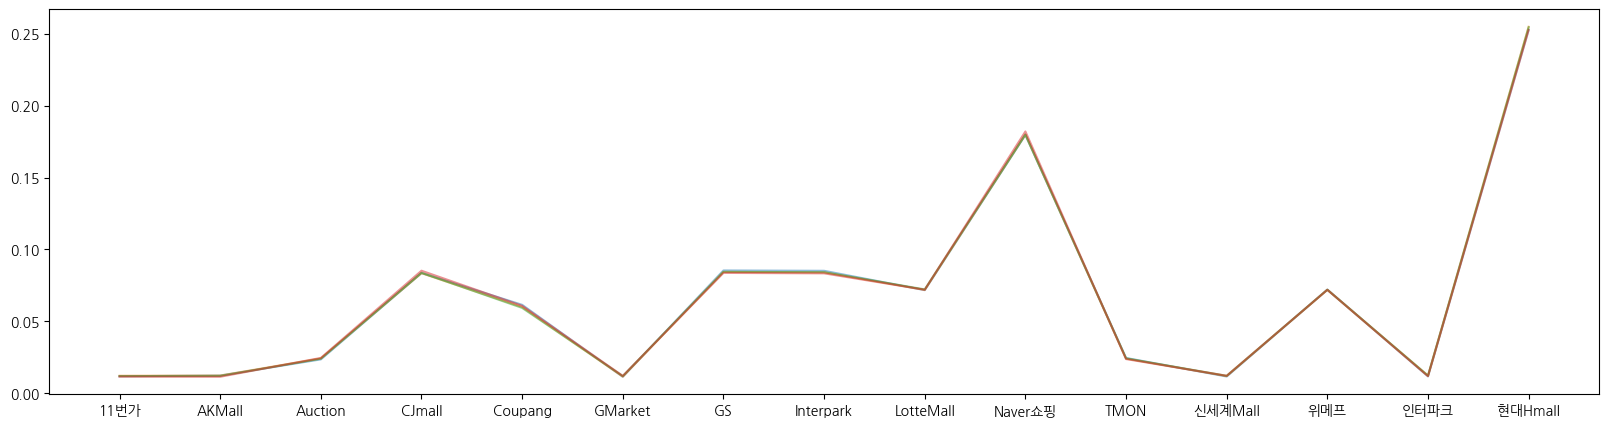

In [75]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(20,5))
plt.plot(sample.columns, sample.iloc[0,:], alpha=0.5)
plt.plot(sample.columns, sample.iloc[1,:], alpha=0.5)
plt.plot(sample.columns, sample.iloc[2,:], alpha=0.5)
plt.plot(sample.columns, sample.iloc[3,:], alpha=0.5)
plt.show()

<BarContainer object of 15 artists>

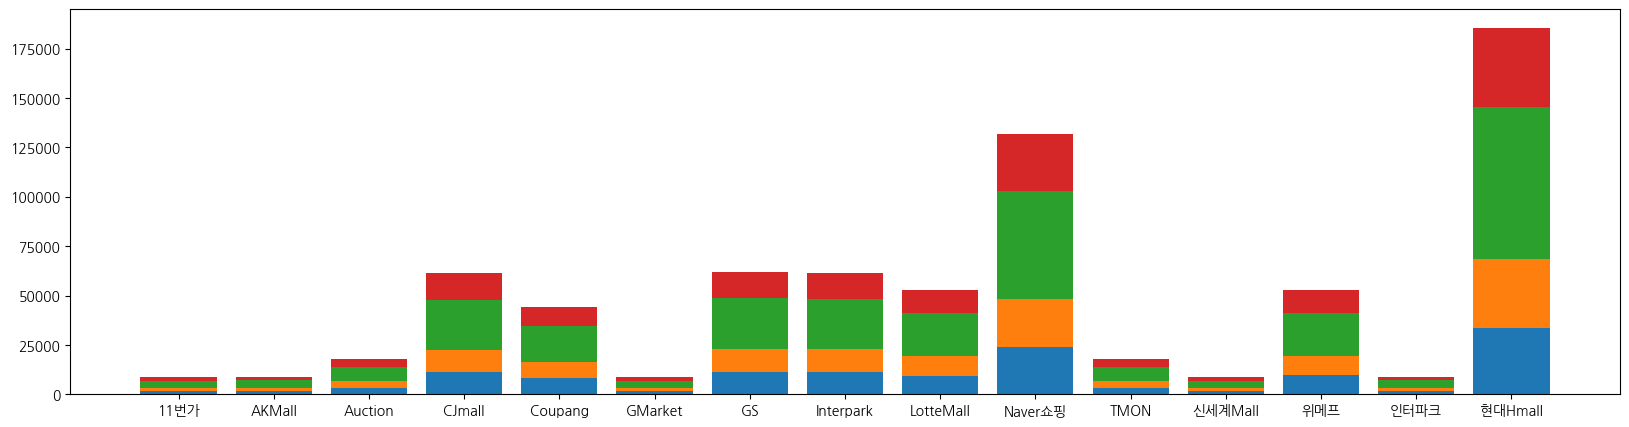

In [188]:
# 누적 막대 그래프로 그려보깅
# normalize 없애고 해보기
sample = pd.crosstab(index=df1.유통Hub, columns=df1.채널)
sample

plt.figure(figsize=(20,5))
plt.bar(sample.columns,sample.iloc[0,:],label='강원')
plt.bar(sample.columns,sample.iloc[1,:],label='경상',bottom=sample.iloc[0,:])
plt.bar(sample.columns,sample.iloc[2,:],label='서울/수도권',bottom=sample.iloc[0,:]+sample.iloc[1,:])
plt.bar(sample.columns,sample.iloc[3,:],label='충청/전라',bottom=sample.iloc[0,:]+sample.iloc[1,:]+sample.iloc[2,:])

### 5. 22년도에 각 영업대표가 각 채널로 유통하는 유통판매금액의 합을 계산해, 22년 영업실적이 가장 높은 영업 대표를 확인하시오.


In [81]:
df1['공급일자'] = pd.to_datetime(df1['공급일자'])
df1.head(3)

,공급ID,공급일자,유통Hub,판매금액,수량,상품코드,제품명,Div,본부,채널,지역,영업대표,물품가격,대분류,소분류,제조사
0,K0110101000004,2021-03-12,충청/전라,1100,1.0,600000000V3_5,2P후로킹분첩,K00,프로페셔널주력사업본부,현대Hmall,3지역,허국,1100,화장품,스폰지/퍼프,미앤지코리아
1,S0110101034218,2021-03-20,서울/수도권,1100,1.0,600000000V3_5,2P후로킹분첩,K2D,프로페셔널주력사업본부,CJmall,1지역,최준,1100,화장품,스폰지/퍼프,미앤지코리아
2,K0110101056887,2021-03-26,충청/전라,1100,1.0,600000000V3_5,2P후로킹분첩,K7C,프로페셔널유지사업본부,위메프,1지역,이영호,1100,화장품,스폰지/퍼프,미앤지코리아


In [133]:
sample = df1[df1['공급일자'].dt.year==2022]
sample.pivot_table(index=['영업대표','채널'],values='판매금액', aggfunc='sum').sort_values('판매금액').tail(1)

,,판매금액
영업대표,채널,
허국,현대Hmall,280525871


### 6. 데이터가 수집된 기간 내, 유통량이 온라인 소비자들의 수요와 관련이 있는지 확인하고자 한다. 
1. 데이터에 가장 많이 유통된 제품의 소분류를 확인하여, 
2. 아래 사이트를 활용해 해당 소분류를 소비자들이 검색했을 때, 
3. 검색량과 유통수량의 상관성이 있는지 분석하시오.
    - https://datalab.naver.com/
    - 성별 / 연령대 / 범위에 따라 각각 계산하시오.

In [89]:
df1.공급일자.min(), df1.공급일자.max()

(Timestamp('2021-03-12 00:00:00'), Timestamp('2023-02-08 00:00:00'))

In [165]:
df1.pivot_table(index='제품명', values='수량', aggfunc='sum').sort_values('수량').tail(1)

,수량
제품명,
2080LINE휴대용세트(브라운),34010.8


In [167]:
df1[df1['제품명']=='2080LINE휴대용세트(브라운)']['소분류'].head(1)

38202    치약/칫솔세트
Name: 소분류, dtype: object

In [168]:
sample = df1[df1['소분류']=='치약/칫솔세트']
sample2 = sample.pivot_table(index='공급일자', values='수량', aggfunc='sum')
sample2 = sample2.reset_index()
sample2

,공급일자,수량
0,2021-03-12,76.0
1,2021-03-13,58.0
2,2021-03-14,50.0
3,2021-03-15,58.0
4,2021-03-16,57.0
...,...,...
676,2023-02-04,67.0
677,2023-02-05,68.0
678,2023-02-06,44.0
679,2023-02-07,45.0


#### PC

In [169]:
pc_datalab = pd.read_excel('실습 파일/칫솔치약_PC_datalab.xlsx', header=6)
pc_datalab['날짜'] = pd.to_datetime(pc_datalab['날짜'])

sample3 = pd.merge(sample2, pc_datalab, left_on='공급일자', right_on='날짜')
sample3

C:\Users\campus2H018\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,공급일자,수량,날짜,치약/칫솔세트
0,2021-03-12,76.0,2021-03-12,46.77419
1,2021-03-13,58.0,2021-03-13,8.06451
2,2021-03-14,50.0,2021-03-14,9.67741
3,2021-03-15,58.0,2021-03-15,45.16129
4,2021-03-16,57.0,2021-03-16,56.45161
...,...,...,...,...
676,2023-02-04,67.0,2023-02-04,11.29032
677,2023-02-05,68.0,2023-02-05,11.29032
678,2023-02-06,44.0,2023-02-06,66.12903
679,2023-02-07,45.0,2023-02-07,75.80645


In [177]:
print(stats.normaltest(sample3['수량']),stats.normaltest(sample3['치약/칫솔세트']))
print('두 그룹 모두 정규성 따르지 않는다')

print('\n','-----','\n')

print(stats.spearmanr(sample3['수량'], sample3['치약/칫솔세트']))
print('p값이 0.05보다 작음으로 귀무가설 기각 상관성이 있다')

NormaltestResult(statistic=329.5674287584674, pvalue=2.724847099695834e-72) NormaltestResult(statistic=18.050774056121313, pvalue=0.00012031623039760687)
두 그룹 모두 정규성 따르지 않는다

 ----- 

SignificanceResult(statistic=-0.1019434213141061, pvalue=0.007759369134304074)
p값이 0.05보다 작음으로 귀무가설 기각 상관성이 있다


#### 모바일

In [171]:
mobile_datalab = pd.read_excel('실습 파일/칫솔치약_모바일_datalab.xlsx', header=6)
mobile_datalab['날짜'] = pd.to_datetime(mobile_datalab['날짜'])

sample3 = pd.merge(sample2, mobile_datalab, left_on='공급일자', right_on='날짜')
sample3

C:\Users\campus2H018\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,공급일자,수량,날짜,치약/칫솔세트
0,2021-03-12,76.0,2021-03-12,34.75609
1,2021-03-13,58.0,2021-03-13,25.60975
2,2021-03-14,50.0,2021-03-14,43.29268
3,2021-03-15,58.0,2021-03-15,43.29268
4,2021-03-16,57.0,2021-03-16,42.68292
...,...,...,...,...
676,2023-02-04,67.0,2023-02-04,36.58536
677,2023-02-05,68.0,2023-02-05,42.07317
678,2023-02-06,44.0,2023-02-06,67.07317
679,2023-02-07,45.0,2023-02-07,60.97560


In [178]:
print(stats.normaltest(sample3['수량']),stats.normaltest(sample3['치약/칫솔세트']))
print('두 그룹 모두 정규성 따르지 않는다')

print('\n','-----','\n')

print(stats.spearmanr(sample3['수량'], sample3['치약/칫솔세트']))
print('p값이 0.05보다 작음으로 귀무가설 기각 상관성이 있다')

NormaltestResult(statistic=329.5674287584674, pvalue=2.724847099695834e-72) NormaltestResult(statistic=18.050774056121313, pvalue=0.00012031623039760687)
두 그룹 모두 정규성 따르지 않는다

 ----- 

SignificanceResult(statistic=-0.1019434213141061, pvalue=0.007759369134304074)
p값이 0.05보다 작음으로 귀무가설 기각 상관성이 있다


#### 여성

In [173]:
w_datalab = pd.read_excel('실습 파일/칫솔치약_여성_datalab.xlsx', header=6)
w_datalab['날짜'] = pd.to_datetime(w_datalab['날짜'])

sample3 = pd.merge(sample2, w_datalab, left_on='공급일자', right_on='날짜')
sample3

C:\Users\campus2H018\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,공급일자,수량,날짜,치약/칫솔세트
0,2021-03-12,76.0,2021-03-12,38.39285
1,2021-03-13,58.0,2021-03-13,24.10714
2,2021-03-14,50.0,2021-03-14,52.67857
3,2021-03-15,58.0,2021-03-15,58.03571
4,2021-03-16,57.0,2021-03-16,50.89285
...,...,...,...,...
676,2023-02-04,67.0,2023-02-04,46.42857
677,2023-02-05,68.0,2023-02-05,51.78571
678,2023-02-06,44.0,2023-02-06,100.00000
679,2023-02-07,45.0,2023-02-07,87.50000


In [179]:
print(stats.normaltest(sample3['수량']),stats.normaltest(sample3['치약/칫솔세트']))
print('두 그룹 모두 정규성 따르지 않는다')

print('\n','-----','\n')

print(stats.spearmanr(sample3['수량'], sample3['치약/칫솔세트']))
print('p값이 0.05보다 작음으로 귀무가설 기각 상관성이 있다')

NormaltestResult(statistic=329.5674287584674, pvalue=2.724847099695834e-72) NormaltestResult(statistic=18.050774056121313, pvalue=0.00012031623039760687)
두 그룹 모두 정규성 따르지 않는다

 ----- 

SignificanceResult(statistic=-0.1019434213141061, pvalue=0.007759369134304074)
p값이 0.05보다 작음으로 귀무가설 기각 상관성이 있다


#### 남성

In [175]:
m_datalab = pd.read_excel('실습 파일/칫솔치약_남성_datalab.xlsx', header=6)
m_datalab['날짜'] = pd.to_datetime(m_datalab['날짜'])

sample3 = pd.merge(sample2, m_datalab, left_on='공급일자', right_on='날짜')
sample3

C:\Users\campus2H018\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,공급일자,수량,날짜,치약/칫솔세트
0,2021-03-12,76.0,2021-03-12,47.82608
1,2021-03-13,58.0,2021-03-13,32.60869
2,2021-03-14,50.0,2021-03-14,34.78260
3,2021-03-15,58.0,2021-03-15,34.78260
4,2021-03-16,57.0,2021-03-16,56.52173
...,...,...,...,...
676,2023-02-04,67.0,2023-02-04,19.56521
677,2023-02-05,68.0,2023-02-05,30.43478
678,2023-02-06,44.0,2023-02-06,45.65217
679,2023-02-07,45.0,2023-02-07,78.26086


In [180]:
print(stats.normaltest(sample3['수량']),stats.normaltest(sample3['치약/칫솔세트']))
print('두 그룹 모두 정규성 따르지 않는다')

print('\n','-----','\n')

print(stats.spearmanr(sample3['수량'], sample3['치약/칫솔세트']))
print('p값이 0.05보다 작음으로 귀무가설 기각 상관성이 있다')

NormaltestResult(statistic=329.5674287584674, pvalue=2.724847099695834e-72) NormaltestResult(statistic=18.050774056121313, pvalue=0.00012031623039760687)
두 그룹 모두 정규성 따르지 않는다

 ----- 

SignificanceResult(statistic=-0.1019434213141061, pvalue=0.007759369134304074)
p값이 0.05보다 작음으로 귀무가설 기각 상관성이 있다
